In [2]:

import sys


from stlab.devices.RS_SGS100A import RS_SGS100A
from stlab.AWG_testing.AWG520_driver_beta import Tektronix_AWG520
# from stlab.devices.rigol_DS1054 import Rigol_DS1054
from stlab.devices.RS_FSV import RS_FSV

from stlab.AWG_testing import AWG_station

from stlab.AWG_testing.sequence import Sequence
from stlab.AWG_testing.element import Element
from stlab.AWG_testing import Pulse_lib as pulse

# import viewer
import imp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
devAWG = Tektronix_AWG520(name='AWG')
AWG = AWG_station.AWG_Station()


Initializing directory for AWG file transfering......


Initializing directory for AWG file transfering......
Instrument State:  Idle
Mode: CONT
Trigger impedance (Ohm): 5.0E+01
Trigger level (V):  1.4
Number of points:  1000
Sample rate (Hz):  1.0000000E+09
Reference Oscillator:  EXT
Amplitude Channel1 (V):  1.0
Offset Channel1 (V): 0.0
Channel1 Marker1_low (V) 0.0
Channel1 Marker1_high (V) 0.0
Channel1 Marker2_low (V) 0.0
Channel1 Marker2_high (V) 0.0
Channel1 state:  off
Amplitude Channel2 (V):  0.5
Offset Channel2 (V): 0.0
Channel2 Marker1_low (V) 0.0
Channel2 Marker1_high (V) 0.0
Channel2 Marker2_low (V) 0.0
Channel2 Marker2_high (V) 0.0
Channel2 state:  off


NameError: name 'AWG' is not defined

In [28]:
devAWG.id()
devAWG.set_run_mode('ENH')

NameError: name 'devAWG' is not defined

In [ ]:
devSGS = RS_SGS100A('TCPIP::192.168.1.37::INSTR')

In [ ]:
devFSV = RS_FSV('TCPIP::192.168.1.105::INSTR')

In [ ]:
devSGS.setCWfrequency(6.0e9)
devSGS.setCWpower(-10)
devSGS.RFon()
devSGS.IQon()

In [58]:
devSGS.setCWpower(-10)


SOUR:POW:POW -1.00000000e+01


In [59]:
# devOsc = Rigol_DS1054('TCPIP::192.168.1.25::INSTR')
# devOsc.id()

In [60]:
devAWG.stop()
devAWG.set_run_mode('ENH')


(15, <StatusCode.success: 0>)

In [ ]:
devFSV.se

In [61]:
devFSV.dev.write("TRAC:IQ:BWID?")

(15, <StatusCode.success: 0>)

In [77]:
devAWG.stop()
devFSV.dev.write("TRAC:IQ ON")
devFSV.dev.write("TRAC:IQ:AVER ON")
devFSV.dev.write("TRAC:IQ:AVER:COUN 1")
devFSV.dev.write("TRAC:IQ:SET NORM,45 MHz,45 MHz,EXT,POS,0,2048")
devFSV.dev.write('FORM REAL 32')
devFSV.dev.write('TRAC:IQ:DATA:FORM COMP')


ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [63]:
devAWG.start()
bla = devFSV.dev.query("TRAC:IQ:DATA:MEM?")
devAWG.stop()


In [64]:
times = np.arange(2048)*1./45.0

In [65]:
blub = np.fromstring(bla, dtype=float, sep=',')
[I,Q] =  np.split(blub, 2)

In [66]:
blub.shape

(4096,)

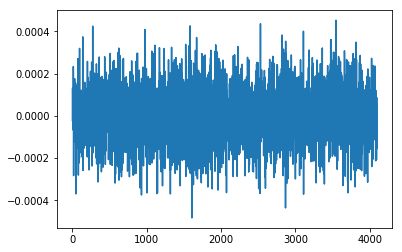

In [67]:
plt.plot(blub)

(0, 8)

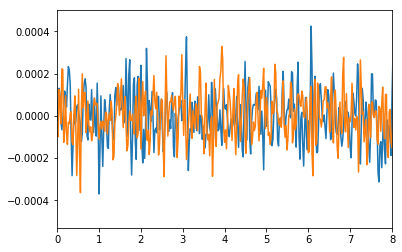

In [68]:
plt.plot(times, I)
plt.plot(times, Q)
plt.xlim(0,8)

In [69]:
integration_indices = np.intersect1d(np.where(times>1.),np.where(times<6.))

In [70]:
print(times[integration_indices[0]])
print(times[integration_indices[-1]])

1.02222222222
5.97777777778


In [71]:
devSGS.setCWphase(20)

SOUR:PHAS 20.00


In [72]:
np.around(360.25, decimals=1)

360.19999999999999

In [73]:
devSGS.getCWphase()

SOUR:PHAS?


20.0

In [74]:
np.average(I[integration_indices])

2.7260555715178532e-07

In [75]:
I_avg=[]
Q_avg=[]
phases =np.linspace(0,360,37)
for phase in phases:
    devSGS.setCWphase(phase)
    devAWG.start()
    devFSV.dev.write("TRAC:IQ:SET NORM,45 MHz,45 MHz,EXT,POS,0,2048")
    bla = devFSV.dev.query("TRAC:IQ:DATA:MEM?")
    devAWG.stop()
    blub = np.fromstring(bla, dtype=float, sep=',')
    [I,Q] =  np.split(blub, 2)

    I_avg.append(np.average(I[integration_indices]))
    Q_avg.append(np.average(Q[integration_indices]))


SOUR:PHAS 0.00
SOUR:PHAS 10.00
SOUR:PHAS 20.00
SOUR:PHAS 30.00
SOUR:PHAS 40.00
SOUR:PHAS 50.00
SOUR:PHAS 60.00
SOUR:PHAS 70.00
SOUR:PHAS 80.00
SOUR:PHAS 90.00
SOUR:PHAS 100.00
SOUR:PHAS 110.00
SOUR:PHAS 120.00
SOUR:PHAS 130.00
SOUR:PHAS 140.00
SOUR:PHAS 150.00
SOUR:PHAS 160.00
SOUR:PHAS 170.00
SOUR:PHAS 180.00
SOUR:PHAS 190.00
SOUR:PHAS 200.00
SOUR:PHAS 210.00
SOUR:PHAS 220.00
SOUR:PHAS 230.00
SOUR:PHAS 240.00
SOUR:PHAS 250.00
SOUR:PHAS 260.00
SOUR:PHAS 270.00
SOUR:PHAS 280.00
SOUR:PHAS 290.00
SOUR:PHAS 300.00
SOUR:PHAS 310.00
SOUR:PHAS 320.00
SOUR:PHAS 330.00
SOUR:PHAS 340.00
SOUR:PHAS 350.00
SOUR:PHAS 360.00


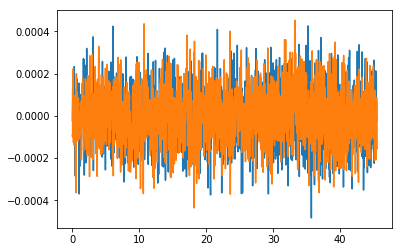

In [76]:
plt.plot(times, I)
plt.plot(times, Q)

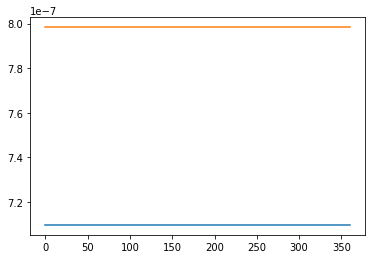

In [49]:
plt.plot(phases, I_avg)
plt.plot(phases, Q_avg)